In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

filename = '/Users/mac/Desktop/BigData_ProjectData/SPARCS-2017.csv'
raw_data = pd.read_csv(filename)
raw_data.head()

/Users/mac/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
1,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
2,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,...,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
3,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84
4,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,...,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,30534.00,11921.05


In [34]:
np.shape(raw_data)

(2343569, 34)

In [35]:
# Drop a few NA records
data = raw_data.dropna(subset = ['Hospital Service Area',
                             'APR Risk of Mortality'])

In [36]:
# Drop unkown gender (no distribution on black people)
data = data[data["Gender"]!="U"]
np.shape(data)

(2338151, 34)

In [37]:
# Drop patients from out of state
data = data[data["Zip Code - 3 digits"]!="OOS"]
np.shape(data)

(2271398, 34)

In [38]:
droplist = ["Discharge Year", # only 2017
            "Zip Code - 3 digits", # patients' code
            "Abortion Edit Indicator", # after dropping na, only one value, N for no abortion.
            "Operating Certificate Number", # assigned by NYS Department of Health
            "Permanent Facility Id", # almost 1-to-1 correspondence to "Facility Name",
            "CCS Diagnosis Code", # 1-to-1 correspondence to "CCS Diagnosis Description",
            "CCS Procedure Code", # 1-to-1 correspondence to "CCS Procedure Description",
            "APR MDC Code", # 1-to-1 correspondence to "APR MDC Description",
            "APR Severity of Illness Code", # 1-to-1 correspondence to "APR Severity of Illness Description",
            "APR DRG Code",# 1-to-1 correspondence to "APR DRG Description"
            "Payment Typology 1", # Don't care payment type in cost bias
            "Payment Typology 2",
            "Payment Typology 3",
            "Total Costs"]# Total estimated cost for the discharge, corr(charge,cost)~0.7
data = data.drop(droplist, axis=1)
print(np.shape(data))

(2271398, 20)


In [39]:
data = data[data["Length of Stay"]!="120 +"]

In [40]:
data["Length of Stay"] = data["Length of Stay"].apply(pd.to_numeric)

In [41]:
avg = data["Total Charges"]/data["Length of Stay"]
data["Average Charges"] = avg
data = data.drop(["Length of Stay","Total Charges"], axis=1)

In [42]:
data = data[data["CCS Diagnosis Description"]!="Liveborn"]
data = data.drop(["Birth Weight"], axis=1)

In [43]:
print(np.shape(data))
data.head()

(2054587, 18)


,Hospital Service Area,Hospital County,Facility Name,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Emergency Department Indicator,Average Charges
0,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,30 to 49,M,White,Not Span/Hispanic,Elective,Home or Self Care,Schizophrenia and other psychotic disorders,NO PROC,Schizophrenia,Mental Diseases and Disorders,Moderate,Minor,Medical,N,5436.571429
1,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,M,White,Spanish/Hispanic,Emergency,Skilled Nursing Home,Hypertension with complications and secondary ...,INDWELLING CATHETER,Heart failure,Diseases and Disorders of the Circulatory System,Major,Moderate,Medical,N,7314.625000
2,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,30 to 49,F,White,Unknown,Emergency,Court/Law Enforcement,Other diseases of kidney and ureters,URETERAL CATHETERIZATN,Urinary stones & acquired upper urinary tract ...,Diseases and Disorders of the Kidney and Urina...,Moderate,Moderate,Medical,N,6607.840000
3,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,F,White,Not Span/Hispanic,Emergency,Skilled Nursing Home,Complications of surgical procedures or medica...,BLOOD TRANSFUSION,"Post-operative, post-traumatic, other device i...","Infectious and Parasitic Diseases, Systemic or...",Moderate,Moderate,Medical,N,9007.772500
4,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,18 to 29,F,White,Spanish/Hispanic,Emergency,Court/Law Enforcement,Septicemia (except in labor),NO PROC,Septicemia & disseminated infections,"Infectious and Parasitic Diseases, Systemic or...",Moderate,Minor,Medical,N,7633.500000


In [44]:
droplist2 = ["CCS Procedure Description",
             "APR DRG Description",
             "APR MDC Description"
            ]
data = data.drop(droplist2, axis=1)
print(np.shape(data))
data.head()

(2054587, 15)


,Hospital Service Area,Hospital County,Facility Name,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCS Diagnosis Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Emergency Department Indicator,Average Charges
0,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,30 to 49,M,White,Not Span/Hispanic,Elective,Home or Self Care,Schizophrenia and other psychotic disorders,Moderate,Minor,Medical,N,5436.571429
1,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,M,White,Spanish/Hispanic,Emergency,Skilled Nursing Home,Hypertension with complications and secondary ...,Major,Moderate,Medical,N,7314.625000
2,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,30 to 49,F,White,Unknown,Emergency,Court/Law Enforcement,Other diseases of kidney and ureters,Moderate,Moderate,Medical,N,6607.840000
3,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,50 to 69,F,White,Not Span/Hispanic,Emergency,Skilled Nursing Home,Complications of surgical procedures or medica...,Moderate,Moderate,Medical,N,9007.772500
4,Hudson Valley,Westchester,Montefiore Mount Vernon Hospital,18 to 29,F,White,Spanish/Hispanic,Emergency,Court/Law Enforcement,Septicemia (except in labor),Moderate,Minor,Medical,N,7633.500000


In [45]:
data.nunique()

Hospital Service Area                        8
Hospital County                             57
Facility Name                              210
Age Group                                    5
Gender                                       2
Race                                         4
Ethnicity                                    4
Type of Admission                            6
Patient Disposition                         20
CCS Diagnosis Description                  258
APR Severity of Illness Description          4
APR Risk of Mortality                        4
APR Medical Surgical Description             2
Emergency Department Indicator               2
Average Charges                        1816972
dtype: int64

In [46]:
data = data.drop(["Hospital Service Area","Facility Name"], axis=1)
data.nunique()

Hospital County                             57
Age Group                                    5
Gender                                       2
Race                                         4
Ethnicity                                    4
Type of Admission                            6
Patient Disposition                         20
CCS Diagnosis Description                  258
APR Severity of Illness Description          4
APR Risk of Mortality                        4
APR Medical Surgical Description             2
Emergency Department Indicator               2
Average Charges                        1816972
dtype: int64

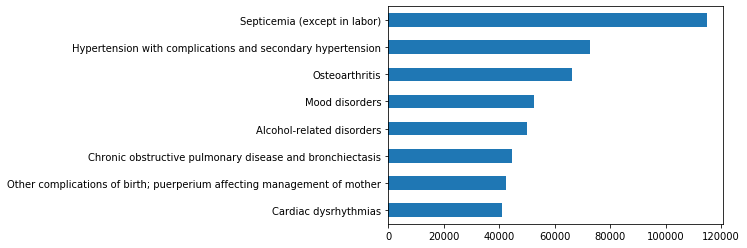

In [47]:
data["CCS Diagnosis Description"].value_counts()[::-1][-8:].plot.barh()

In [48]:
septicemia = data[data["CCS Diagnosis Description"]=="Septicemia (except in labor)"]

In [49]:
set(septicemia["CCS Diagnosis Description"])

{'Septicemia (except in labor)'}

In [50]:
septicemia = septicemia.drop(["CCS Diagnosis Description"],axis=1)
print(np.shape(septicemia))
septicemia.head()

(114925, 12)


,Hospital County,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Emergency Department Indicator,Average Charges
4,Westchester,18 to 29,F,White,Spanish/Hispanic,Emergency,Court/Law Enforcement,Moderate,Minor,Medical,N,7633.5000
33,Sullivan,50 to 69,F,Other Race,Not Span/Hispanic,Emergency,Home or Self Care,Major,Major,Medical,Y,5308.1176
39,Sullivan,30 to 49,F,White,Not Span/Hispanic,Emergency,Home or Self Care,Moderate,Minor,Medical,Y,6556.5300
42,Sullivan,70 or Older,M,White,Not Span/Hispanic,Emergency,Expired,Major,Extreme,Medical,Y,4920.2000
52,Sullivan,50 to 69,F,White,Not Span/Hispanic,Emergency,Home or Self Care,Moderate,Minor,Medical,Y,6057.8075


In [51]:
hypertension = data[data["CCS Diagnosis Description"] == "Hypertension with complications and secondary hypertension"]
hypertension = hypertension.drop(["CCS Diagnosis Description"],axis=1)
print(np.shape(hypertension))
hypertension.head()

(72725, 12)


,Hospital County,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Emergency Department Indicator,Average Charges
1,Westchester,50 to 69,M,White,Spanish/Hispanic,Emergency,Skilled Nursing Home,Major,Moderate,Medical,N,7314.625000
15,Westchester,50 to 69,F,Black/African American,Unknown,Emergency,Home or Self Care,Major,Moderate,Medical,N,9945.521667
84,Sullivan,70 or Older,M,White,Not Span/Hispanic,Emergency,Home or Self Care,Major,Major,Medical,Y,5637.810000
104,Sullivan,70 or Older,F,White,Spanish/Hispanic,Emergency,Short-term Hospital,Minor,Moderate,Medical,Y,5874.040000
150,Kings,70 or Older,F,White,Not Span/Hispanic,Emergency,Another Type Not Listed,Moderate,Moderate,Medical,Y,7915.341667


In [52]:
osteoarthritis = data[data["CCS Diagnosis Description"] == "Osteoarthritis"]
osteoarthritis = osteoarthritis.drop(["CCS Diagnosis Description"],axis=1)
print(np.shape(osteoarthritis))
osteoarthritis.head()

(66151, 12)


,Hospital County,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Emergency Department Indicator,Average Charges
181,Manhattan,50 to 69,M,Black/African American,Spanish/Hispanic,Elective,Skilled Nursing Home,Moderate,Moderate,Surgical,N,24950.420000
238,Manhattan,50 to 69,F,Other Race,Not Span/Hispanic,Elective,Home w/ Home Health Services,Moderate,Minor,Surgical,N,14469.760000
245,Manhattan,70 or Older,F,Other Race,Not Span/Hispanic,Elective,Home w/ Home Health Services,Minor,Minor,Surgical,N,13254.737500
247,Manhattan,30 to 49,F,Other Race,Not Span/Hispanic,Elective,Home w/ Home Health Services,Moderate,Minor,Surgical,N,18037.363333
420,Manhattan,70 or Older,M,Black/African American,Spanish/Hispanic,Elective,Inpatient Rehabilitation Facility,Moderate,Moderate,Surgical,N,27857.861250


In [53]:
sepname = '/Users/mac/Desktop/BigData_ProjectData/SPARCS-2017-septicemia-Bias.csv'
septicemia.to_csv(sepname, sep='\t', index=False)

In [54]:
hypername = '/Users/mac/Desktop/BigData_ProjectData/SPARCS-2017-hypertension-Bias.csv'
hypertension.to_csv(hypername, sep='\t', index=False)

In [55]:
ostname = '/Users/mac/Desktop/BigData_ProjectData/SPARCS-2017-osteoarthritis-Bias.csv'
osteoarthritis.to_csv(ostname, sep='\t', index=False)